# Generating Mock Data for Spatial Data Science

*Mock data is useful to design new experiments, test new analytical techniques, evaluating the performance of data systems, and to generally get a handle on a new analytical problem, among other things. In some instances, mock data is the goal - think video games or other virtual worlds that need to have endless horizons. In other cases, mock data is to help us think through a problem or test a system. This later case is our primary use in spatial data science, where mock data helps us think through the data modeling challenge. Specifically, it helps us think about the pros and cons of different approaches to problem formulation, abstraction, and representation of the spatial entities and their attributes.*

Last updated: Nov 28, 2023

In [1]:
# Imports
import arcpy
import numpy as np

## Primitives

Primitives in GIScience are the data structures that we hold near and dear to our hearts. Specifically, when we talk about primitives, we are talking about points, lines, and polygons. They are how we represent vector data within our computers, meaning that they are representations and abstractions of the real-world phenomena that we are trying to model and depict.

In Python, we can create our own implementations of these primitives by using classes and object-oriented programming (OOP) or we can make use of existing libraries that have already done this work. In this notebook, we will use Esri's ArcPy package to make use of primitives for the purpose of generating mock data. This could also be done through open-source packages like Shapely.

As we explore the primitives in ArcPy, you will be able to see that the primitives are actually interconnected and build off of one another. In other words, lines and polygons are really just collections of points that we call arrays. The relationships between primitives can be seen below.

```mermaid
flowchart LR
    pt[Point]
    li[Python List of Points]
    pg[PointGeometry]
    ar[Array]
    pll[Polyline]
    plg[Polygon]
    mp[MultiPoint]

    pt --> li & pg
    li --> ar
    ar --> pll & plg & mp
```

Furthermore, here is a diagram of what this might look like with actual code.

```mermaid
flowchart LR
    pt["arcpy.Point(3,4)"]
    li["[arcpy.Point(3,4), arcpy.Point(4,6), arcpy.Point(3,8)]"]
    pg["arcpy.PointGeometry(arcpy.Point(3,4))"]
    ar["arcpy.Array([arcpy.Point(3,4), arcpy.Point(4,6), arcpy.Point(3,8)])"]
    pll["arcpy.Polyline(arcpy.Array([arcpy.Point(3,4), arcpy.Point(4,6), arcpy.Point(3,8)]))"]
    plg["arcpy.Polygon(arcpy.Array([arcpy.Point(3,4), arcpy.Point(4,6), arcpy.Point(3,8)]))"]
    mp["arcpy.MultiPoint(arcpy.Array([arcpy.Point(3,4), arcpy.Point(4,6), arcpy.Point(3,8)]))"]

    pt --> li & pg
    li --> ar
    ar --> pll & plg & mp
```

### Point

First, let's start by creating a single point with an X and Y coordinate. Then, we can take a look at the varioud different methods and attributes of the point object.

In [2]:
# Creating a Point
point_1 = arcpy.Point(1, 1)

point_1

<Point (1.0, 1.0, #, #)>

In [3]:
# Point Methods
[method_name for method_name in dir(arcpy.Point) if callable(getattr(arcpy.Point, method_name)) and "_" not in method_name]

['clone',
 'contains',
 'crosses',
 'disjoint',
 'equals',
 'overlaps',
 'touches',
 'within']

In [4]:
# Point Attributes
[attr_name for attr_name in dir(arcpy.Point) if not callable(getattr(arcpy.Point, attr_name)) and "_" not in attr_name]

['ID', 'M', 'X', 'Y', 'Z']

### PointGeometry

With `arcpy.Point` there is no coordinate system associated with the Point object, and we typically only use it to construct other types of primitives.

If we actually want to use a point as the primitive itself, then we can convert the Point object to a PointGeometry object. All we need to do is pass in the Point object along with the spatial reference we are using and then we have a PointGeometry ready to be used.

You'll also notice that there are far more methods and attributes that can be utilized with PointGeometry objects compared to Point objects, in ArcPy.

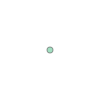

In [5]:
# Creating a PointGeometry from Point
point_geometry_1 = arcpy.PointGeometry(point_1, 4326)

point_geometry_1

In [6]:
# PointGeometry Methods
[method_name for method_name in dir(arcpy.PointGeometry) if callable(getattr(arcpy.PointGeometry, method_name)) and "_" not in method_name]

['angleAndDistanceTo',
 'boundary',
 'buffer',
 'clip',
 'contains',
 'convexHull',
 'crosses',
 'cut',
 'densify',
 'difference',
 'disjoint',
 'distanceTo',
 'equals',
 'generalize',
 'getArea',
 'getGeohash',
 'getLength',
 'getPart',
 'intersect',
 'measureOnLine',
 'overlaps',
 'pointFromAngleAndDistance',
 'positionAlongLine',
 'projectAs',
 'queryPointAndDistance',
 'segmentAlongLine',
 'snapToLine',
 'symmetricDifference',
 'toCoordString',
 'touches',
 'union',
 'within']

In [7]:
# PointGeometry Attributes
[attr_name for attr_name in dir(arcpy.PointGeometry) if not callable(getattr(arcpy.PointGeometry, attr_name)) and "_" not in attr_name]

['JSON',
 'WKB',
 'WKT',
 'area',
 'centroid',
 'extent',
 'firstPoint',
 'hasCurves',
 'hullRectangle',
 'isMultipart',
 'labelPoint',
 'lastPoint',
 'length',
 'length3D',
 'partCount',
 'pointCount',
 'spatialReference',
 'trueCentroid',
 'type']

### Array

Now, what if we want to create a Polygon, Polyline, or MultiPoint object? First we need to create a collection of `arcpy.Point` objects in what is referred to as an `arcpy.Array`.

To do this, we can simply create a Python list of multiple points and then feed that into the array.

It is also worth noting that **order is important**! Think of each point as a node, where they will be sequentially connected to one another based on the order.

In [8]:
# Creating an Array from a list of Point objects
list_of_points = [arcpy.Point(-1, 0), arcpy.Point(0, 1), arcpy.Point(1, 0), arcpy.Point(0, -1)]

array_1 = arcpy.Array(list_of_points)

array_1

<Array [<Point (-1.0, 0.0, #, #)>, <Point (0.0, 1.0, #, #)>, <Point (1.0, 0.0, #, #)>, <Point (0.0, -1.0, #, #)>]>

In [9]:
# Array Methods
[method_name for method_name in dir(arcpy.Array) if callable(getattr(arcpy.Array, method_name)) and "_" not in method_name]

['add',
 'append',
 'clone',
 'extend',
 'getObject',
 'insert',
 'next',
 'remove',
 'removeAll',
 'replace',
 'reset']

In [10]:
# Array Attributes
[attr_name for attr_name in dir(arcpy.Array) if not callable(getattr(arcpy.Array, attr_name)) and "_" not in attr_name]

['count']

### MultiPoint

With an array of points in hand, we can now start to create some of the other primitives like Polylines, Polygons, and MultiPoints.

First, let's create a MultiPoint object by simply passing in the array, along with a spatial reference.

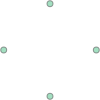

In [11]:
# Creating a MultiPoint from an Array
multipoint_1 = arcpy.Multipoint(array_1, 4326)

multipoint_1

In [12]:
# Array Methods
[method_name for method_name in dir(arcpy.Multipoint) if callable(getattr(arcpy.Multipoint, method_name)) and "_" not in method_name]

['angleAndDistanceTo',
 'boundary',
 'buffer',
 'clip',
 'contains',
 'convexHull',
 'crosses',
 'cut',
 'densify',
 'difference',
 'disjoint',
 'distanceTo',
 'equals',
 'generalize',
 'getArea',
 'getGeohash',
 'getLength',
 'getPart',
 'intersect',
 'measureOnLine',
 'overlaps',
 'pointFromAngleAndDistance',
 'positionAlongLine',
 'projectAs',
 'queryPointAndDistance',
 'segmentAlongLine',
 'snapToLine',
 'symmetricDifference',
 'touches',
 'union',
 'within']

In [13]:
# Array Attributes
[attr_name for attr_name in dir(arcpy.Multipoint) if not callable(getattr(arcpy.Multipoint, attr_name)) and "_" not in attr_name]

['JSON',
 'WKB',
 'WKT',
 'area',
 'centroid',
 'extent',
 'firstPoint',
 'hasCurves',
 'hullRectangle',
 'isMultipart',
 'labelPoint',
 'lastPoint',
 'length',
 'length3D',
 'partCount',
 'pointCount',
 'spatialReference',
 'trueCentroid',
 'type']

### Polyline

Next, we can use the same process to create a Polyline object, by passing in the array and a spatial reference.

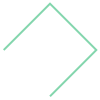

In [14]:
# Creating a Polyline from an Array
polyline_1 = arcpy.Polyline(array_1, 4326)

polyline_1

In [15]:
# Array Methods
[method_name for method_name in dir(arcpy.Polyline) if callable(getattr(arcpy.Polyline, method_name)) and "_" not in method_name]

['angleAndDistanceTo',
 'boundary',
 'buffer',
 'clip',
 'contains',
 'convexHull',
 'crosses',
 'cut',
 'densify',
 'difference',
 'disjoint',
 'distanceTo',
 'equals',
 'generalize',
 'getArea',
 'getGeohash',
 'getLength',
 'getPart',
 'intersect',
 'measureOnLine',
 'overlaps',
 'pointFromAngleAndDistance',
 'positionAlongLine',
 'projectAs',
 'queryPointAndDistance',
 'segmentAlongLine',
 'snapToLine',
 'symmetricDifference',
 'touches',
 'union',
 'within']

In [16]:
# Array Attributes
[attr_name for attr_name in dir(arcpy.Polyline) if not callable(getattr(arcpy.Polyline, attr_name)) and "_" not in attr_name]

['JSON',
 'WKB',
 'WKT',
 'area',
 'centroid',
 'extent',
 'firstPoint',
 'hasCurves',
 'hullRectangle',
 'isMultipart',
 'labelPoint',
 'lastPoint',
 'length',
 'length3D',
 'partCount',
 'pointCount',
 'spatialReference',
 'trueCentroid',
 'type']

### Polygon

Lastly, we can repeat the process for creating a Polygon.

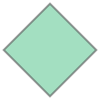

In [17]:
# Creating a Polygon from an Array
polygon_1 = arcpy.Polygon(array_1, 4326)

polygon_1

In [18]:
# Array Methods
[method_name for method_name in dir(arcpy.Polygon) if callable(getattr(arcpy.Polygon, method_name)) and "_" not in method_name]

['angleAndDistanceTo',
 'boundary',
 'buffer',
 'clip',
 'contains',
 'convexHull',
 'crosses',
 'cut',
 'densify',
 'difference',
 'disjoint',
 'distanceTo',
 'equals',
 'generalize',
 'getArea',
 'getGeohash',
 'getLength',
 'getPart',
 'intersect',
 'measureOnLine',
 'overlaps',
 'pointFromAngleAndDistance',
 'positionAlongLine',
 'projectAs',
 'queryPointAndDistance',
 'segmentAlongLine',
 'snapToLine',
 'symmetricDifference',
 'touches',
 'union',
 'within']

In [19]:
# Array Attributes
[attr_name for attr_name in dir(arcpy.Polygon) if not callable(getattr(arcpy.Polygon, attr_name)) and "_" not in attr_name]

['JSON',
 'WKB',
 'WKT',
 'area',
 'centroid',
 'extent',
 'firstPoint',
 'hasCurves',
 'hullRectangle',
 'isMultipart',
 'labelPoint',
 'lastPoint',
 'length',
 'length3D',
 'partCount',
 'pointCount',
 'spatialReference',
 'trueCentroid',
 'type']

## Creating Mock Data with ArcPy

With a firm grasp of how primitives work in ArcPy, it then becomes easier to generate mock data, by making use of the primitives alongside the same random data generation tools used in other notebooks.

First, let's use ArcPy to create a File Geodatabase along with some Feature Classes to generate some data for.

### Preparation

Nearly anything that can be done in ArcGIS Pro can also be done in Python, through the use of ArcPy. This is especially useful for automating tasks like working with Geodatabases and Feature Classes.

First, we will create a File Geodatabase in our current directory (this is often denoted using the shorthand notation of `.` rather than writing out the entire absolute path).

After that, we will create two Feature Classes in the geodatabase; one for storing some points and another for storing some lines.

In [20]:
# Create new File Geodatabase
arcpy.management.CreateFileGDB(".", "example_gdb")

In [21]:
# Create empty Feature Classes
arcpy.management.CreateFeatureclass(
    "./example_gdb.gdb",
    "example_points",
    geometry_type="POINT",
    spatial_reference=arcpy.SpatialReference(4326)
)

arcpy.management.CreateFeatureclass(
    "./example_gdb.gdb",
    "example_line",
    geometry_type="POLYLINE",
    spatial_reference=arcpy.SpatialReference(4326)
)

### Points

With Feature Classes created, we can now generate some mock points to put into them.

We will create a list of 25 X coordinates and a list of 25 Y coordinates by using a uniform distribution to create some variation around the point `-94, 45`. Meaning that all of our points will be within 1 degree of that location.

After the lists are generated, the `zip` and `list` functions can be used to combine the two lists into a single list of tuples containing the coordinates for 25 different points.

We can then use an `arcpy.da.InsertCursor` to insert individual features/rows into the Feature Class and an `arcpy.da.SearchCursor` to iterate through the features and print out the content of the Feature Class.

In [22]:
# Create sample X & Y coordinates - within 1 degree of -94, 45
x = [-94 + np.random.uniform(-1, 1) for i in range(25)]
y = [45 + np.random.uniform(-1, 1) for i in range(25)]

records = list(zip(x, y))

records

[(-93.26488055418498, 45.8111263704319),
 (-94.497125704115, 45.2393372061804),
 (-94.27017498319738, 44.47693685124445),
 (-94.0532395497925, 44.45297870789413),
 (-94.40977714617784, 45.344696112548036),
 (-93.53694432586946, 44.7314032647624),
 (-93.15958540906317, 44.16072980237841),
 (-94.78846205352454, 45.76892934126494),
 (-93.28086066580292, 44.37260296448455),
 (-93.05154639113691, 45.03901770577855),
 (-93.28518598652103, 44.110116615771105),
 (-94.001871438747, 45.180242339694885),
 (-94.47092373149499, 44.67372340352443),
 (-93.65458904339684, 44.879556297021026),
 (-94.6320811473581, 45.516692259319974),
 (-93.48348112962427, 44.61437597280168),
 (-93.6673520927718, 44.35410693872357),
 (-93.01628496436633, 45.29930581955008),
 (-93.91466882611148, 44.986984672441494),
 (-93.50234153700305, 44.5151079275781),
 (-93.32397624162319, 45.24790049186987),
 (-94.28506321869123, 44.79713020423166),
 (-93.3510291487098, 45.778439044057585),
 (-94.65869371490415, 44.55601556958557

In [23]:
# Insert records into Feature Class
with arcpy.da.InsertCursor('./example_gdb.gdb/example_points', ['SHAPE@XY']) as cursor:
    for row in records:
        cursor.insertRow([row])

In [24]:
# Use SearchCursor to check that Inserts succeeded
with arcpy.da.SearchCursor('./example_gdb.gdb/example_points', ['*']) as cursor:
    for row in cursor:
        print(row)

(1, (-93.80550847299997, 44.923009110000066))
(2, (-93.90456717699999, 44.70955059100004))
(3, (-94.04131820399994, 44.26883352100003))
(4, (-93.18592256399995, 44.36081028500007))
(5, (-93.32922528699999, 44.670228415000054))
(6, (-94.47033864799994, 44.09176126800003))
(7, (-93.35315741199997, 44.61659804200008))
(8, (-94.74614874499997, 44.48878614900008))
(9, (-93.98701453699994, 44.40386145000008))
(10, (-94.72445839999995, 45.846394633000045))
(11, (-93.58336674599997, 44.69210787900005))
(12, (-94.21788475599999, 45.648698058000036))
(13, (-93.16208422199998, 44.056188304000045))
(14, (-93.09122993499994, 44.007287302000066))
(15, (-93.53328968699998, 44.51225741600007))
(16, (-94.06847884999996, 45.28995802000003))
(17, (-93.72234409199996, 45.02074698000007))
(18, (-94.93293549899994, 45.71283539700005))
(19, (-93.40112326599996, 45.072848786000066))
(20, (-93.84713366599999, 44.966627903000074))
(21, (-93.62382930499996, 44.92648890000004))
(22, (-94.85257995199999, 44.098699

### Line

This process can be repeated for lines, with the exception of how the lines are actually generated. The process used here can also be used for polygons and multipoints.

First, we will make 5 total lines, each with somewhere between 3 and 7 vertices (the number of vertices is randomly chosen).

We can then generate the the random X and Y values for all of the vertices and go through the conversion process of transforming a list of points into a polyline.

Lastly, with a polyline created, we can then append that feature to a list and continue to generate the other lines, which will all be generated using that same process.

Then, it's just a matter of using the Insert and Search Cursors to insert the data and verify the results of our operations.

In [25]:
# Create sample X & Y coordinates - within 0.25 degree of -94, 45
list_of_lines = []

number_lines = 5

for i in range(number_lines):
    # Determine number of points in feature
    number_points = np.random.randint(3, 7)
    
    # Create coordinates for points
    x = [-94 + np.random.uniform(-0.25, 0.25) for i in range(number_points)]
    y = [45 + np.random.uniform(-0.25, 0.25) for i in range(number_points)]
    
    # Compile coordinates to list of Points
    vertices = [arcpy.Point(x[i], y[i]) for i in range(number_points)]

    # Convert list of Points to Array
    feature_array = arcpy.Array(vertices)
    
    # Convert Array Polyline and add to list of features
    list_of_lines.append(arcpy.Polyline(feature_array, 4326))

In [26]:
# Insert records into Feature Class
with arcpy.da.InsertCursor('./example_gdb.gdb/example_line', ['SHAPE@']) as cursor:
    for row in list_of_lines:
        cursor.insertRow([row])

In [27]:
# Use SearchCursor to check that Inserts succeeded
with arcpy.da.SearchCursor('./example_gdb.gdb/example_line', ['*']) as cursor:
    for row in cursor:
        print(row)

(1, (-93.9133023019439, 44.977086016447224), 0.21988343390110188)
(2, (-94.05611185499374, 44.93637868609848), 0.5379637410083707)
(3, (-94.00928791549924, 44.91526090252612), 0.5836279946472069)
(4, (-94.05936706202978, 44.96314322658895), 1.524124864555194)
(5, (-94.03084031495398, 45.181959761345894), 0.6370810798205422)
